In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de archivos


In [5]:
assignments = pd.read_csv('assignments.csv', sep=',')
contacts = pd.read_csv('contacts.csv', sep = ',')

#### Se procede a familiarizarse con la data cargada

In [6]:
assignments.head()

,id_user_anon,ab
0,3e3b1bc7-9c46-4798-b955-8ed3f6bdf841,treatment
1,99fef26b-5b8c-4d96-b6f4-552a951512d6,treatment
2,25886018-ed8c-4c40-9915-ead001e2c021,control
3,f7e16080-c7ae-4e46-8247-26f92d4495a6,treatment
4,9c2d741a-acfe-4728-ba3b-0571bfd82306,treatment


In [10]:
contacts.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests_first,m_interactions,m_first_message_length_in_characters,dim_contact_channel_first,dim_room_type,dim_total_reviews,dim_person_capacity,dim_guest_language,dim_host_language
0,56d70d7c-1d0a-4594-a250-ed62f7cf7ac4,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-01-13 21:03:07.0,2013-01-14 21:19:42.0,2013-01-14 21:19:42.0,2013-01-14 21:19:42.0,2013-01-18,2013-01-20,2.0,13,165.0,book_it,Private room,78,2,NaN,es
1,dcfb93c4-07ca-41e8-b134-89b49ddc7a36,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-01-15 23:43:49.0,2013-01-16 09:04:37.0,2013-01-16 09:04:37.0,2013-01-16 09:04:37.0,2013-01-23,2013-01-25,2.0,5,NaN,book_it,Private room,78,2,NaN,es
2,aef63ee0-7fd8-449f-867d-e710c39694e1,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-03-19 21:30:13.0,2013-03-20 12:50:49.0,2013-03-20 12:50:49.0,2013-03-20 12:50:49.0,2013-05-31,2013-06-03,2.0,7,350.0,book_it,Private room,78,2,NaN,es
3,58788b6f-1215-40a5-8fb0-75d2e399880c,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-01-03 16:32:01.0,2013-01-03 17:02:13.0,2013-01-03 17:02:53.0,2013-01-03 17:02:53.0,2013-02-09,2013-02-11,2.0,5,426.0,book_it,Private room,78,2,NaN,es
4,c3945c48-53b6-4e19-8bda-7d5b51d14ec1,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-04-13 04:31:33.0,2013-04-13 16:43:53.0,2013-04-13 16:44:20.0,2013-04-13 16:44:20.0,2013-06-06,2013-06-08,2.0,7,239.0,book_it,Private room,78,2,NaN,es


In [15]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 18 columns):
id_guest_anon                           23143 non-null object
id_host_anon                            23143 non-null object
id_listing_anon                         23143 non-null object
ts_interaction_first                    23143 non-null object
ts_reply_at_first                       21751 non-null object
ts_accepted_at_first                    16745 non-null object
ts_booking_at                           16691 non-null object
ds_checkin_first                        23143 non-null object
ds_checkout_first                       23143 non-null object
m_guests_first                          23106 non-null float64
m_interactions                          23143 non-null int64
m_first_message_length_in_characters    20917 non-null float64
dim_contact_channel_first               23143 non-null object
dim_room_type                           23143 non-null object
dim_total_reviews     

In [16]:
assignments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
id_user_anon    19996 non-null object
ab              19996 non-null object
dtypes: object(2)
memory usage: 312.5+ KB


## Grafica para conocer el numero de usuarios que utilizaron book_it o instant_booked

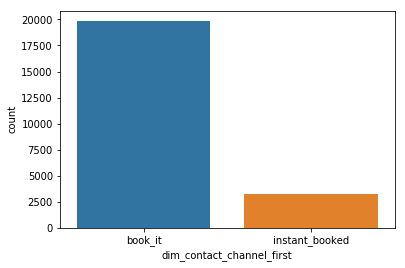

In [12]:
sns.countplot(contacts['dim_contact_channel_first'])
plt.show()

Es claro que la mayor parte de los usuarios prefiere utilizar book_it y no el metodo de reserva instantanea

# Número de usuarios que realizaron booking

In [37]:
contacts['booked'] = contacts['ts_booking_at'].isnull().apply(lambda x: 0 if x==True else 1)

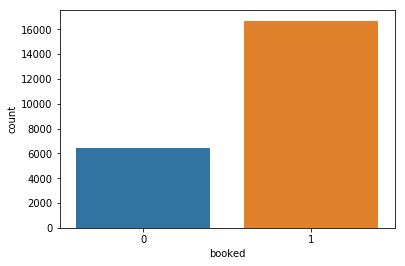

In [38]:
sns.countplot(contacts['booked'])
plt.show()

In [43]:
#se crea una columna extra, se le asigna 1 si el usuario selecciono la opcion book_it
contacts['logica_book_it']=contacts['dim_contact_channel_first'].apply(lambda x: 1 if x=='book_it' else 0)

In [44]:
#operacion logica: si escogio book_it y realizo una reservacion, entonces 1
contacts['book%book_it'] = contacts['logica_book_it'] * contacts['booked']

In [48]:
# se crea un nuevo dataframe que contenga solo los usuarios que escogieron la opcion de book_it
df_bookit = contacts[contacts['logica_book_it'] == 1]

## A partir del nuevo df_bookit se grafica para conocer los usuarios "book_it" que resultaron en una reserva o booking

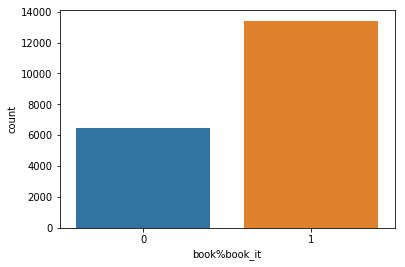

In [52]:
sns.countplot(df_bookit['book%book_it'])
plt.show()

Desde el principio fue notable que la mayoria de usuarios utiliza la opción de book_it. Sin embargo, un poco menos de la mitad de los mismos realmente termina realizando una reserva.

### Número de usuarios con reserva hecha

In [66]:
df_bookit[df_bookit['book%book_it'] == 1].count().head(1)

id_guest_anon    13406
dtype: int64

### Número de usuarios sin reserva hecha

In [67]:
df_bookit[df_bookit['book%book_it'] == 0].count().head(1)

id_guest_anon    6452
dtype: int64

In [72]:
noreservation = round((6452/13406)*100,2)
f"Porcentaje de usuarios que usan book_it pero no reservan: {noreservation}%"

'Porcentaje de usuarios que usan book_it pero no reservan: 48.13%'

# A partir de este punto es mejor realizar una exploración de datos utilizando ML

## Objetivos:
1. Parametrizar la data para utilizarla en un modelo descriptivo y predictivo
2. Conocer que tipo de interacciones u opciones resultan en bookings
3. Analizar cuales variables tienen mayor peso a la hora de tomar la decisión de realizar el booking
4. Descubrir insights que conlleven a que las interacciones del usuario resulten en bookings

### Plan para explorar utilizando ML:
  1. Utilizar random forest para realizar forescast de bookings
  2. Luego de obtener los resultado de random forest se puede conocer cuales parametros o variables son más importantes a traves de la funcion: featureimportances


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### Estandarización de data y creación de nuevo dataframe para modelo RF

Al principio de este documento se observo la información de los datos. A partir de ello, puede apreciarse que la fechas no se encuentran en formato DateTime. Por lo tanto, no puede realizarse operaciones de resta para conocer tiempos. Por ejemplo, el tiempo que pasa entre un inquiry del usuario y la respuesta dada por el host.

In [74]:
#Transformacion de variables a tipo datetime
contacts['ts_interaction_first'] = pd.to_datetime(contacts['ts_interaction_first'])
contacts['ds_checkin_first'] = pd.to_datetime(contacts['ds_checkin_first'])
contacts['ds_checkout_first'] = pd.to_datetime(contacts['ds_checkout_first'])
contacts['ts_accepted_at_first'] = pd.to_datetime(contacts['ts_accepted_at_first'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ts_reply_at_first'] = pd.to_datetime(contacts['ts_reply_at_first'])

In [75]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 21 columns):
id_guest_anon                           23143 non-null object
id_host_anon                            23143 non-null object
id_listing_anon                         23143 non-null object
ts_interaction_first                    23143 non-null datetime64[ns]
ts_reply_at_first                       21751 non-null datetime64[ns]
ts_accepted_at_first                    16745 non-null datetime64[ns]
ts_booking_at                           16691 non-null datetime64[ns]
ds_checkin_first                        23143 non-null datetime64[ns]
ds_checkout_first                       23143 non-null datetime64[ns]
m_guests_first                          23106 non-null float64
m_interactions                          23143 non-null int64
m_first_message_length_in_characters    20917 non-null float64
dim_contact_channel_first               23143 non-null object
dim_room_type                       

Como se puede observar, el tipo de datos que involucran fechas ya ha sido cambiado

## POR RAZONES DE TIEMPO PARA LA REALIZACION DE LA PRUEBA (EN MI CASO 2 DIAS) NO SE PUDO COMPLETAR EL ANALISIS UTILIZANDO RF Y SE PROCEDE A LA PREGUNTA 2.

# Evaluación del nuevo feature


In [80]:
contacts.columns

Index(['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
       'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first',
       'm_guests_first', 'm_interactions',
       'm_first_message_length_in_characters', 'dim_contact_channel_first',
       'dim_room_type', 'dim_total_reviews', 'dim_person_capacity',
       'dim_guest_language', 'dim_host_language', 'booked', 'logica_book_it',
       'book%book_it'],
      dtype='object')

In [81]:
assignments.columns

Index(['id_user_anon', 'ab'], dtype='object')

In [83]:
#Se asume que id_user_anon y id_guest_anon corresponden al mismo usuario, por lo que se le cambia el nombre
#al ID de assignments para ser igual al ID de contacts.
assignments.columns = ['id_guest_anon','ab'] 
assignments.columns

Index(['id_guest_anon', 'ab'], dtype='object')

In [102]:
#se unen ambas tablas a traves de un merge
df_unido = contacts.merge(assignments, on=['id_guest_anon'], how = 'left')
df_unido.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests_first,...,dim_contact_channel_first,dim_room_type,dim_total_reviews,dim_person_capacity,dim_guest_language,dim_host_language,booked,logica_book_it,book%book_it,ab
0,56d70d7c-1d0a-4594-a250-ed62f7cf7ac4,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-01-13 21:03:07,2013-01-14 21:19:42,2013-01-14 21:19:42,2013-01-14 21:19:42,2013-01-18,2013-01-20,2.0,...,book_it,Private room,78,2,NaN,es,1,1,1,control
1,dcfb93c4-07ca-41e8-b134-89b49ddc7a36,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-01-15 23:43:49,2013-01-16 09:04:37,2013-01-16 09:04:37,2013-01-16 09:04:37,2013-01-23,2013-01-25,2.0,...,book_it,Private room,78,2,NaN,es,1,1,1,control
2,aef63ee0-7fd8-449f-867d-e710c39694e1,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-03-19 21:30:13,2013-03-20 12:50:49,2013-03-20 12:50:49,2013-03-20 12:50:49,2013-05-31,2013-06-03,2.0,...,book_it,Private room,78,2,NaN,es,1,1,1,treatment
3,58788b6f-1215-40a5-8fb0-75d2e399880c,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-01-03 16:32:01,2013-01-03 17:02:13,2013-01-03 17:02:53,2013-01-03 17:02:53,2013-02-09,2013-02-11,2.0,...,book_it,Private room,78,2,NaN,es,1,1,1,treatment
4,c3945c48-53b6-4e19-8bda-7d5b51d14ec1,65a56b50-faf2-44a2-845f-0c467f41d720,4deeb033-183e-437c-b94c-851ffee8cec8,2013-04-13 04:31:33,2013-04-13 16:43:53,2013-04-13 16:44:20,2013-04-13 16:44:20,2013-06-06,2013-06-08,2.0,...,book_it,Private room,78,2,NaN,es,1,1,1,treatment


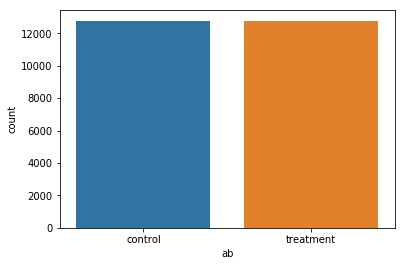

In [93]:
#Grafico para comprobar contidad de usuarios en control y treatment
sns.countplot(df_unido['ab'])
plt.show()

Se puede apreciar facilmente que los usuarios fueron divididos 50% y 50% para la aplicación del nuevo feature

In [94]:
#Suma de usuarios que reservaron segun feature
control = df_unido[['booked','ab']].groupby('ab').sum()
control

,booked
ab,
control,8368.0
treatment,8323.0


In [95]:
df_unido[df_unido['ab'] == 'control'].count().head(1)

id_guest_anon    12771
dtype: int64

In [100]:
porcentaje_control = round((8368/12771)*100,2)
f"El porcentaje de usuarios que estuvieron bajo control y reservaron es de {porcentaje_control}%"

'El porcentaje de usuarios que estuvieron bajo control y reservaron es de 65.52%'

In [103]:
porcentaje_treatment = round((8323.0/12771)*100,2)
f"El porcentaje de usuarios que no estuvieron bajo control y reservaron es de {porcentaje_treatment}%"

'El porcentaje de usuarios que no estuvieron bajo control y reservaron es de 65.17%'

## Conclusiones de nuevo feature:
    1.Si se evalua con respecto a la conversión del feature en una reserva, es notorio que no tiene mayor efecto. Esto puede apreciarse en los porcentajes presentados anteriormente, en ambos casos el porcentaje de reserva es aproximadamente 65%
    2. El feature puede ser util si se desea evaluar las caracteristicas que resaltan de cada host para que luego ellos puedan tomar en cuenta dicha información para mercadear mejor su oferta en el sitio.